In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Path to your main directory containing subdirectories for each class
data_dir = 'train'

# Load the dataset from the directory
# You can set parameters like batch_size, image_size, etc.
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,  # Shuffle the data
    batch_size=32,  # Define batch size
    image_size=(224, 224),  # Resize images to 224x224
    label_mode='categorical',  # 'int' for integer labels, 'categorical' for one-hot encoded
    seed=123,  # Seed for reproducibility
)

Found 15557 files belonging to 23 classes.


In [19]:
img = next(iter(train_dataset))[0][0]
mean = np.mean(img, axis=(0, 1))
mean, img.shape

(array([131.50613,  96.93008,  69.2022 ], dtype=float32),
 TensorShape([224, 224, 3]))

In [6]:
# Load a pre-trained model without the final classification layers (feature extractor)
base_model = tf.keras.applications.ResNet50(
    include_top=False,  # We don't need the classification layers
    weights='imagenet',  # Use pre-trained weights
    pooling='avg'  # Pool the features to get a feature vector
)

In [27]:
base_model.input, base_model.output

(<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=None, name=keras_tensor>,
 <KerasTensor shape=(None, 2048), dtype=float32, sparse=False, name=keras_tensor_175>)

In [9]:
base_model.predict(np.random.rand(1, 224, 224, 3))  # Test the model with random input

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.       , 0.       , 0.       , ..., 1.5311385, 0.       ,
        0.       ]], dtype=float32)

In [38]:
first_batch = next(iter(train_dataset))
images = first_batch[0]
print('Image shape:', images.shape)
print('Image example:', images[0])
features = base_model(images)
print('Feature shape:', features.shape)
print('Feature example:', features[0])

Image shape: (32, 224, 224, 3)
Image example: tf.Tensor(
[[[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 1.         1.         1.       ]
  [ 1.         1.         1.       ]
  [ 1.         1.         1.       ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 1.         1.         1.       ]
  [ 1.         1.         1.       ]
  [ 1.         1.         1.       ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 1.         1.         1.       ]
  [ 1.         1.         1.       ]
  [ 1.         1.         1.       ]]

 ...

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 7.934096   5.934096   6.934096 ]
  [ 4.576494   2.5764942  3.5764942]
  [ 9.418055   7.525232   8.418055 ]]

 [[ 0.         0.

In [49]:
# predict 10 batches of images
features = np.empty((0, 2048))  # Initialize an empty array to store the features (2048 for ResNet50)
for i in range(50):
    images = next(iter(train_dataset))[0]
    labels = next(iter(train_dataset))[1]
    new_features = base_model(images).numpy()
    features = np.vstack([features, new_features])

In [51]:
features.shape

(1600, 2048)

In [42]:
features.numpy()

array([[0.01591029, 0.7053727 , 0.17340356, ..., 2.2170024 , 0.1446645 ,
        0.01788371],
       [1.5652028 , 0.30473837, 0.3397831 , ..., 0.7646261 , 0.        ,
        0.01716884],
       [1.3096514 , 1.4939271 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18374251, 1.1578566 , 0.        , ..., 0.02736477, 0.        ,
        0.        ],
       [0.4900262 , 0.31429622, 0.21526182, ..., 0.22667038, 0.06775206,
        0.        ],
       [1.299182  , 0.13825049, 0.3243117 , ..., 0.01375524, 0.        ,
        0.0752807 ]], dtype=float32)

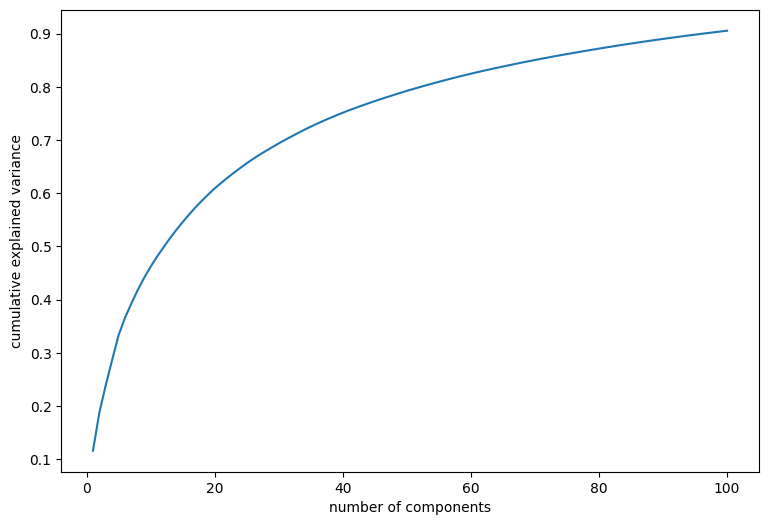

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100).fit(features)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


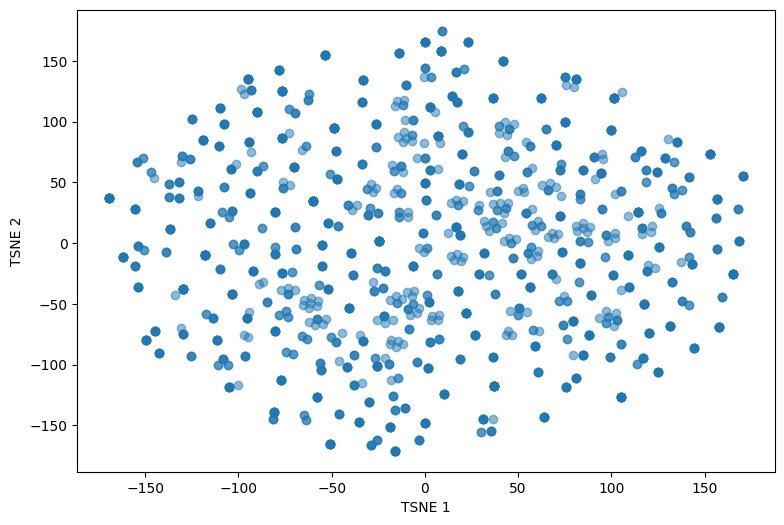

In [54]:
from sklearn.manifold import TSNE

features = pca.transform(features)
features_embedded = TSNE(n_components=2).fit_transform(features)

plt.figure(figsize=(9,6))
plt.scatter(features_embedded[:,0], features_embedded[:,1], alpha=0.5)
plt.xlabel('TSNE 1')

plt.ylabel('TSNE 2')
plt.show()